# Basic K-Nearest Neighbors Regression

## K-Nearest Neighbors Algorithm in a Nutshell

TO-DO: write notes on KNN here
.
.
.


In [1]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

In [2]:
df = pd.read_csv('../data/processed/housing-san-jose-cleaned.csv')
df

,price,sq ft (living),sq ft (lot),bd,ba,year built,year renov,stories,rooms,address
0,998888,1333,164,2,2,2008,2009,1,4,38 N Almaden Blvd UNIT 911
1,550000,852,4809,2,1,1930,0,1,0,"255 S 24th St,"
2,1200000,2316,5519,4,3,1901,2016,2,13,"755 E Saint James St,"
3,419000,645,1772,1,1,1990,0,1,0,2463 Jubilee Ln
4,2699000,2723,244807,4,3,1949,1949,1,9,11321 Canon Vista Ave
5,889000,1553,5000,4,3,1980,1980,1,7,1851 Pine Hollow Cir
6,675000,1008,5998,3,1,1954,0,1,0,3432 San Pablo Ave


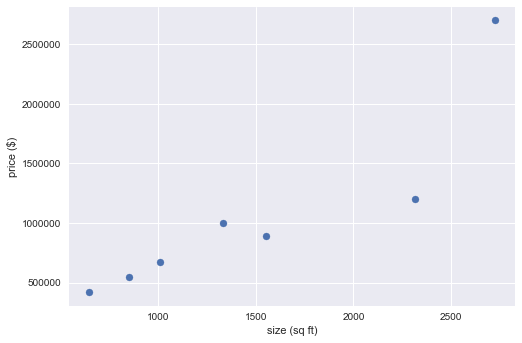

In [3]:
# plot data
x,y = df['sq ft (living)'],df['price']
x = x.values.reshape(-1,1)
plt.scatter(x,y)
plt.xlabel('size (sq ft)')
plt.ylabel('price ($)')
plt.show()

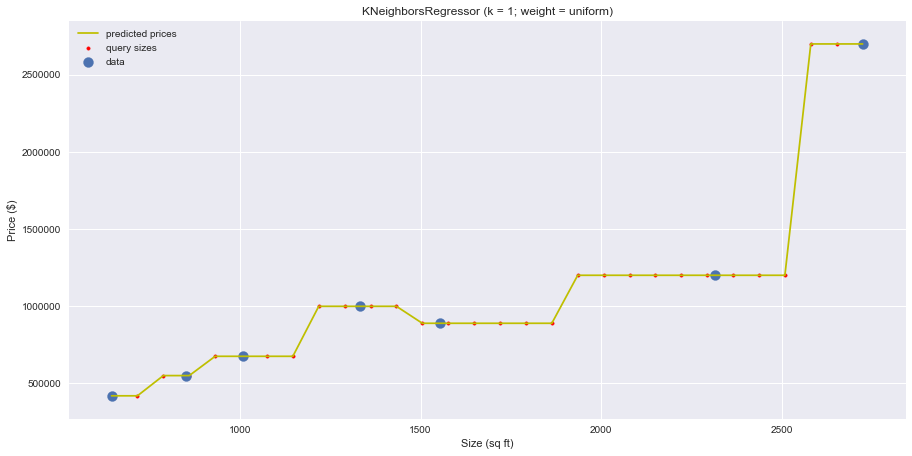

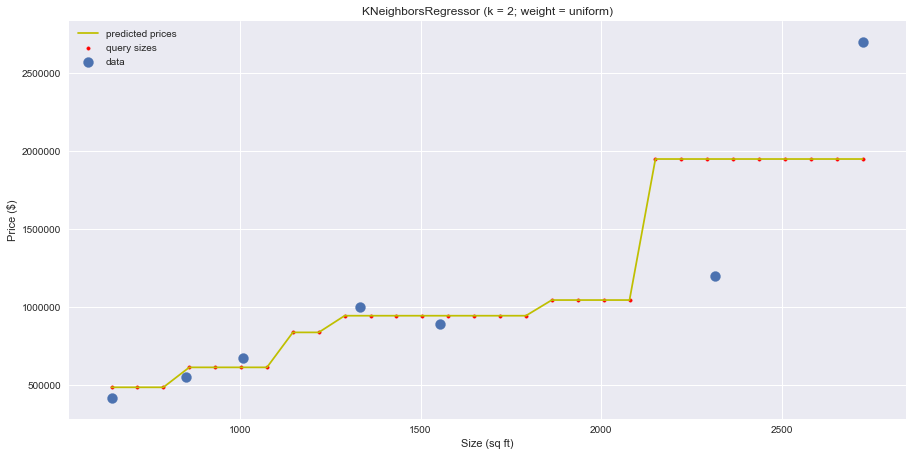

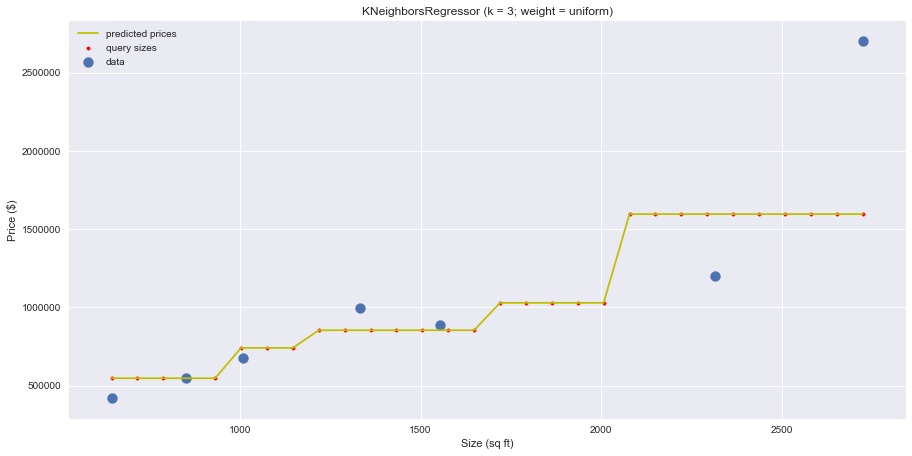

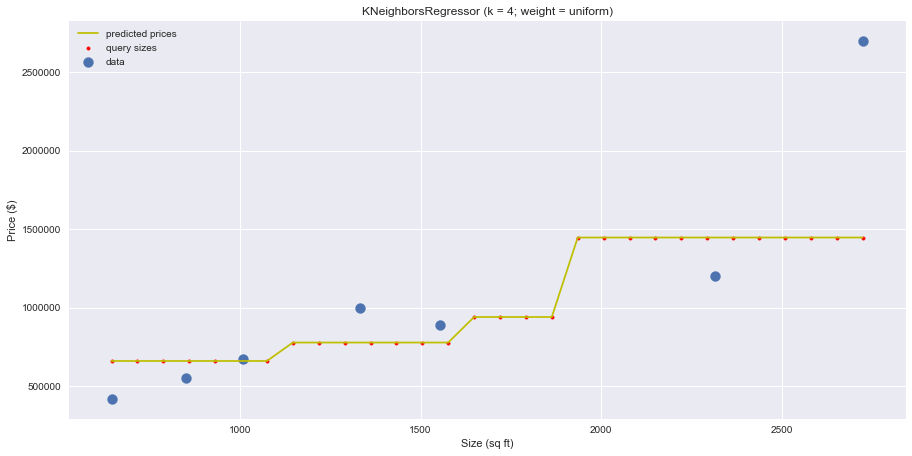

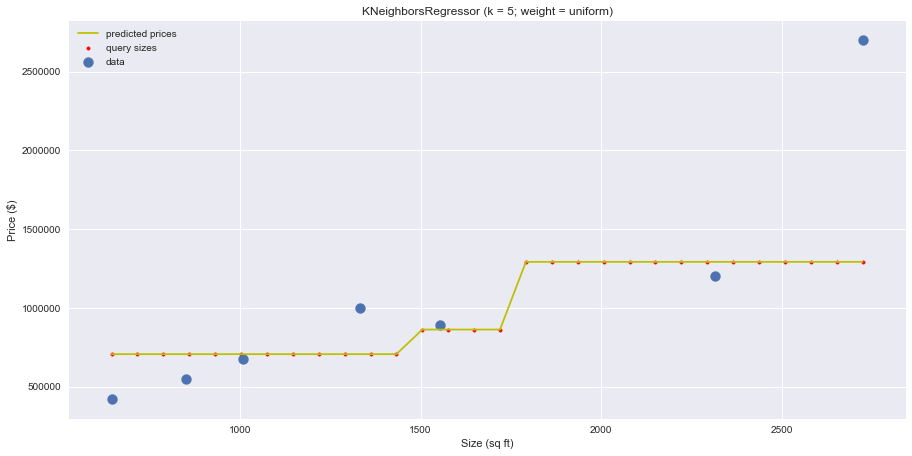

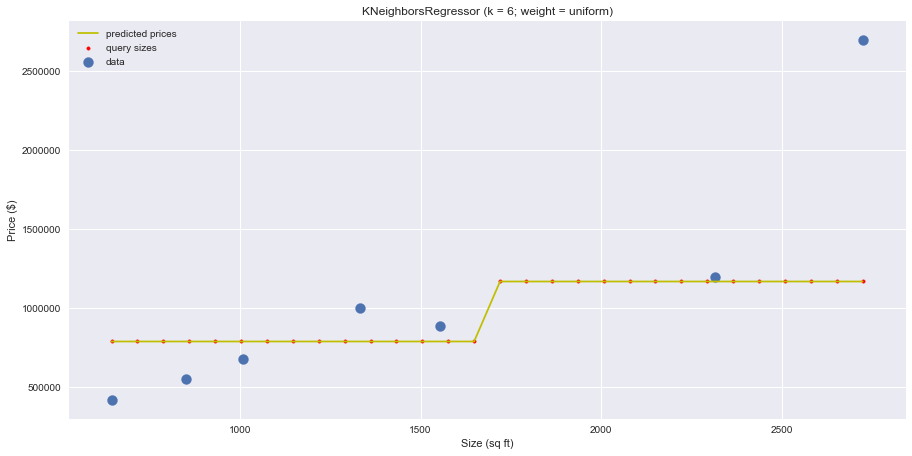

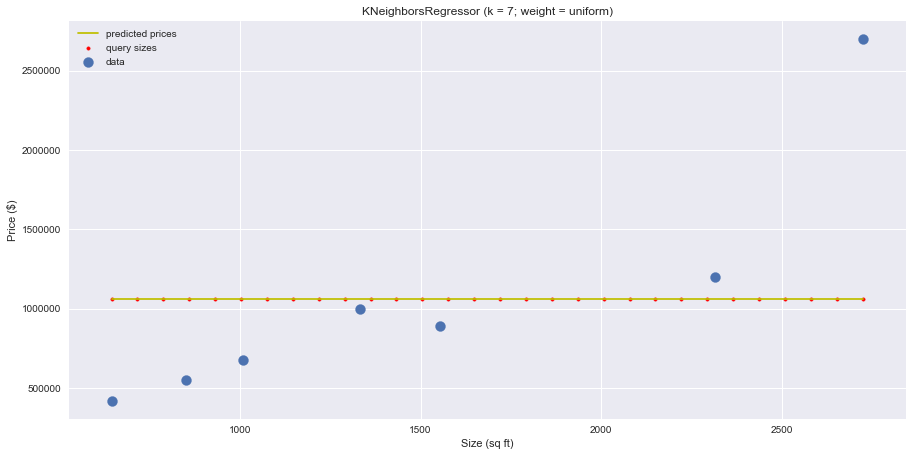

In [4]:
# use sklearn to perform k-nn with different numbers of neighbors (k) with uniform weights
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = [1,2,3,4,5,6,7]

for n in n_neighbors:

    knn = KNeighborsRegressor(n_neighbors=n) # default neighbor = 1; default weight = uniform
    knn.fit(x,y)

    T = np.linspace(df['sq ft (living)'].min(),df['sq ft (living)'].max(),30).reshape(-1,1)

    y_preds = knn.predict(T)
    
    plt.figure(figsize=(15, 60))
    plt.subplot(7, 1, n)
    plt.scatter(T,y_preds, label='query sizes', marker='.', c='r')
    plt.scatter(x,y, label='data', s=100)
    plt.plot(T,y_preds, label='predicted prices', c='y')
    plt.ylabel("Price ($)")
    plt.xlabel("Size (sq ft)")
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i; weight = uniform)" % (n))
    
plt.show()


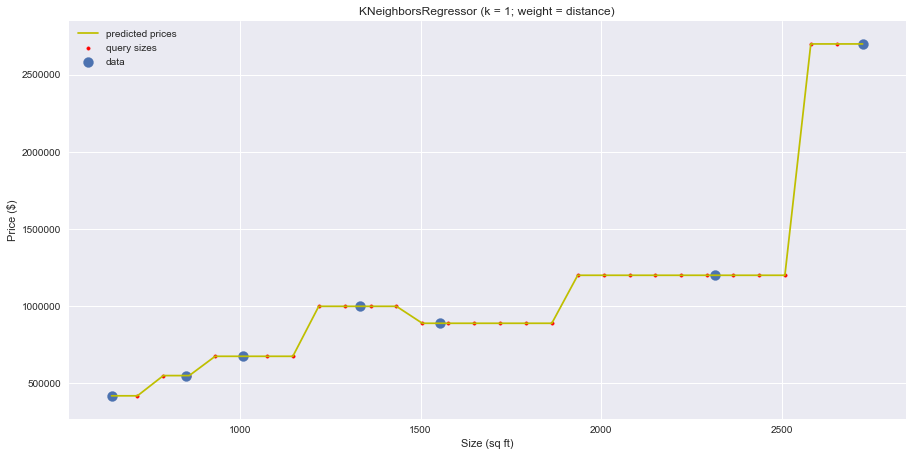

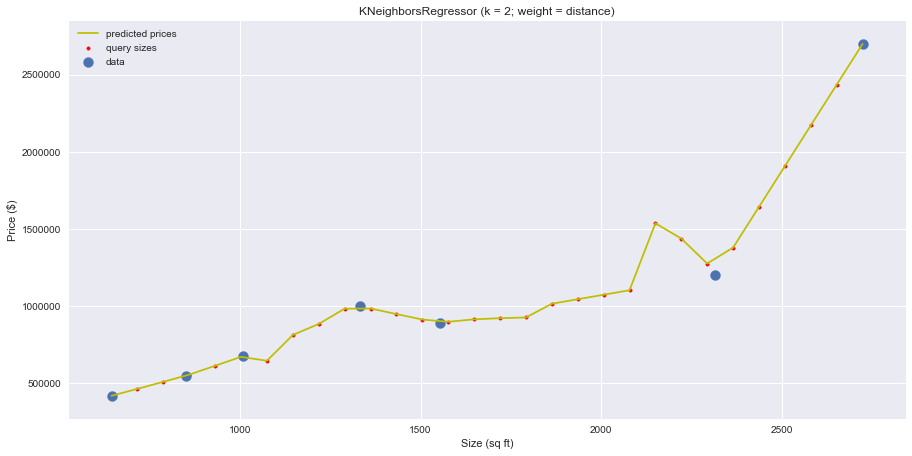

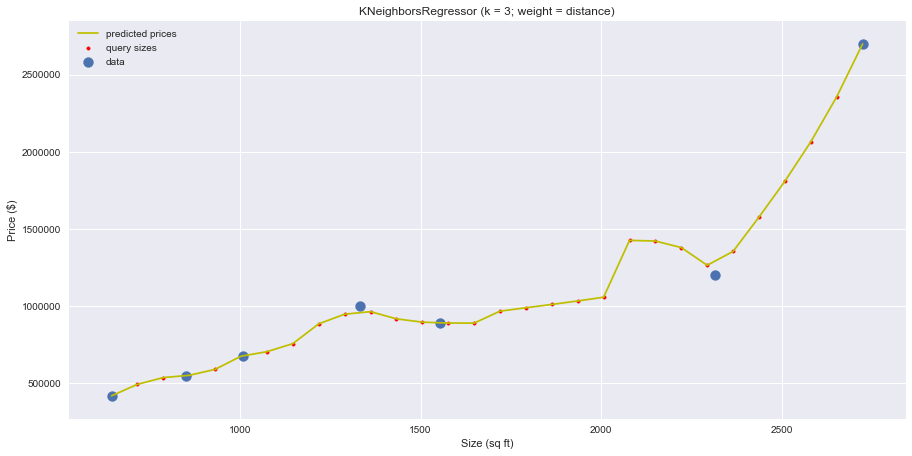

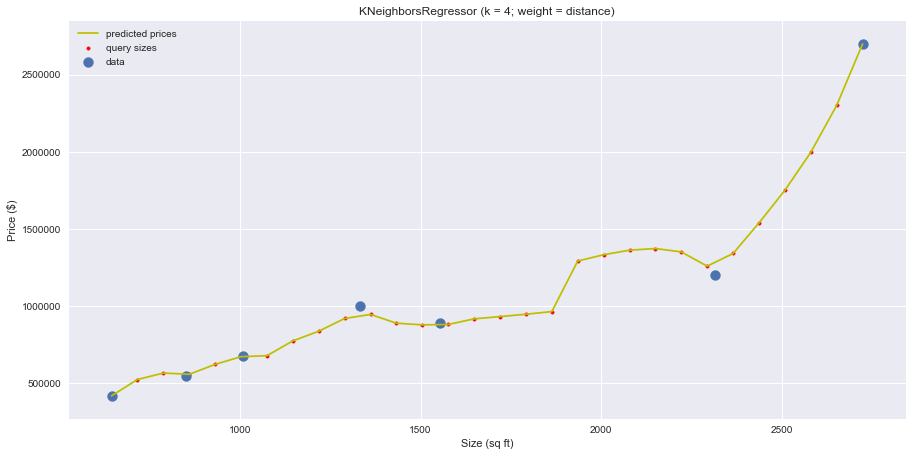

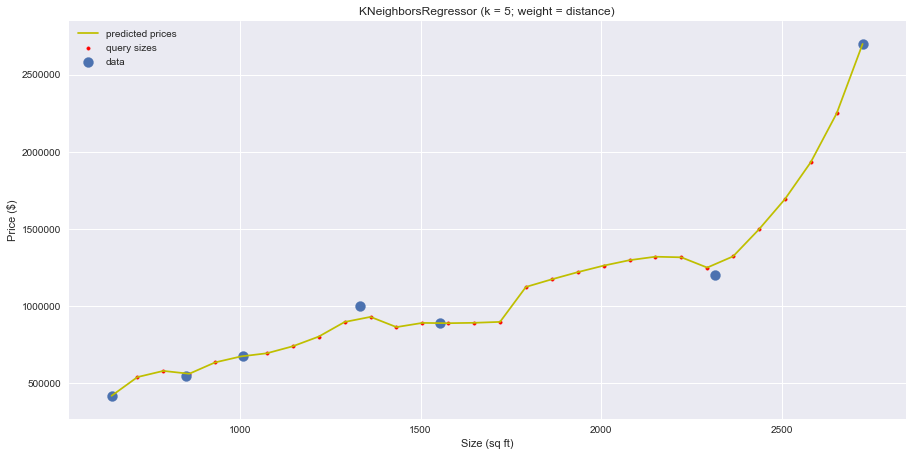

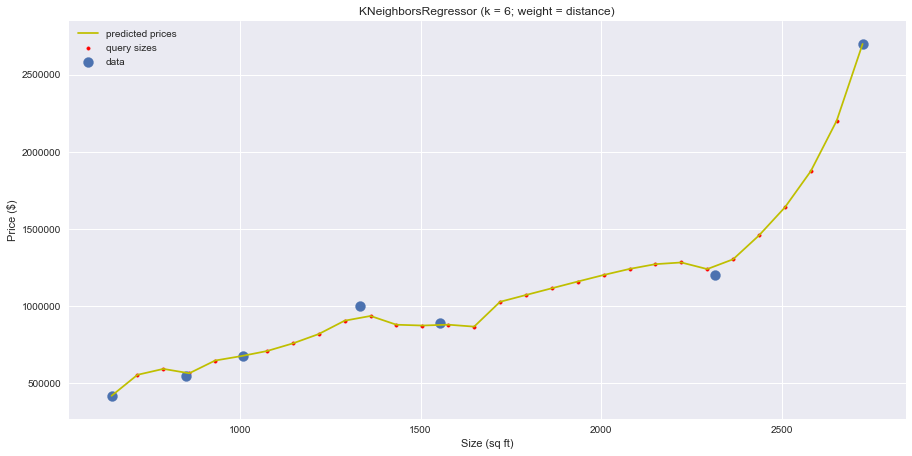

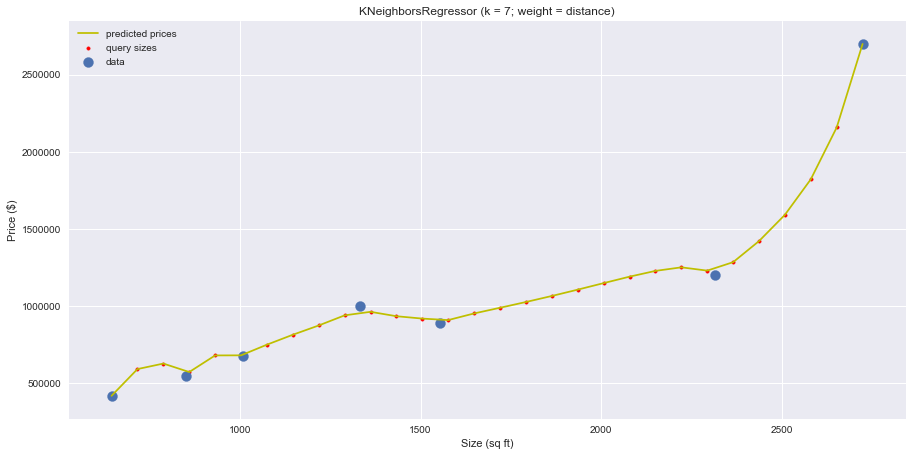

In [5]:
# use sklearn to perform k-nn with different numbers of neighbors (k) with weights = distance

for n in n_neighbors:

    knn = KNeighborsRegressor(n_neighbors=n, weights='distance') # default neighbor = 1; default weight = uniform
    knn.fit(x,y)

    T = np.linspace(df['sq ft (living)'].min(),df['sq ft (living)'].max(),30).reshape(-1,1)

    y_preds = knn.predict(T)
    
    plt.figure(figsize=(15, 60))
    plt.subplot(7, 1, n)
    plt.scatter(T,y_preds, label='query sizes', marker='.', c='r')
    plt.scatter(x,y, label='data', s=100)
    plt.plot(T,y_preds, label='predicted prices', c='y')
    plt.ylabel("Price ($)")
    plt.xlabel("Size (sq ft)")
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i; weight = distance)" % (n))
        
plt.show()

## Resources / Further Readings

- http://scikit-learn.org/stable/modules/neighbors.html
- http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py
- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
- https://www.dataquest.io/blog/k-nearest-neighbors-in-python/
- https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#exploring-knn-in-code
- https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html
- https://www.youtube.com/watch?v=09mb78oiPkA
- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm